In [ ]:
# >%matplotlib notebook

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matminer.featurizers.structure import XRDPowderPattern
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 8]

In [2]:
df = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\pkl_files\structure_df_hfo2_deg.pkl')
df

,structure,name
0,"[[-8.61272484 -7.88167576 2.62521821] Hf, [-6...",Ag_HfO2_cat_3.125_222_m.cif
1,"[[1.3712414 2.40756655 4.39098403] Hf, [3.594...",Ag_HfO2_cat_3.125_222_o.cif
2,"[[-8.53301004 -7.98868059 -6.22875708] Hf, [-6...",Ag_HfO2_cat_3.125_222_p-o.cif
3,"[[-8.67975354 -7.62941739 -6.3023347 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_t.cif
4,"[[-3.67797655 -7.85511112 3.50964345] Hf, [-1...",Ag_HfO2_cat_6.25_122_m.cif
...,...,...
1720,"[[-8.8325459 -5.11876687 -8.83263341] Hf, [-8...",Zr_HfO2_inter_6.25_212_t.cif
1721,"[[ 1.33174688 -10.13321591 -3.50925873] Hf, ...",Zr_HfO2_inter_6.25_221_m.cif
1722,"[[1.35177643 0.21454301 1.88617815] Hf, [1.334...",Zr_HfO2_inter_6.25_221_o.cif
1723,"[[ 1.19408471 10.08133632 1.28483187] Hf, [1....",Zr_HfO2_inter_6.25_221_p-o.cif


In [3]:
xrd = XRDPowderPattern(two_theta_range=(5, 65)) # this time a lower resolution with only 1° stepsize
df = xrd.fit_featurize_dataframe(df, 'structure')
df

,structure,name,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,...,xrd_51,xrd_52,xrd_53,xrd_54,xrd_55,xrd_56,xrd_57,xrd_58,xrd_59,xrd_60
0,"[[-8.61272484 -7.88167576 2.62521821] Hf, [-6...",Ag_HfO2_cat_3.125_222_m.cif,1.518137e-94,8.024178e-81,3.273109e-68,1.030364e-56,2.503174e-46,4.693123e-37,6.790521e-29,7.582537e-22,...,3.654555e-02,3.656930e-02,0.019465,0.018862,0.009929,0.021335,0.012226,0.021756,0.015340,0.012870
1,"[[1.3712414 2.40756655 4.39098403] Hf, [3.594...",Ag_HfO2_cat_3.125_222_o.cif,2.367371e-93,1.143696e-79,4.179513e-67,1.155345e-55,2.415843e-45,3.821170e-36,4.571882e-28,4.137752e-21,...,1.701254e-02,3.950473e-02,0.030045,0.012214,0.022384,0.026998,0.015514,0.027088,0.009157,0.000600
2,"[[-8.53301004 -7.98868059 -6.22875708] Hf, [-6...",Ag_HfO2_cat_3.125_222_p-o.cif,1.431067e-92,3.333884e-79,6.403758e-67,1.014176e-55,1.324297e-45,1.425778e-36,1.265645e-28,9.263309e-22,...,9.056303e-03,6.085070e-03,0.001687,0.019056,0.028518,0.058570,0.047583,0.013500,0.022258,0.004167
3,"[[-8.67975354 -7.62941739 -6.3023347 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_t.cif,0.000000e+00,0.000000e+00,3.628265e-300,1.724126e-275,7.085019e-252,2.517765e-229,7.737334e-208,2.056221e-187,...,6.186101e-12,5.051081e-08,0.000051,0.004590,0.044745,0.092309,0.039346,0.009642,0.024387,0.006526
4,"[[-3.67797655 -7.85511112 3.50964345] Hf, [-1...",Ag_HfO2_cat_6.25_122_m.cif,2.081721e-94,1.081954e-80,4.334764e-68,1.338730e-56,3.187070e-46,5.848722e-37,8.273726e-29,9.022194e-22,...,3.569853e-02,3.580791e-02,0.019706,0.018950,0.010129,0.021674,0.013610,0.021826,0.014414,0.011389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,"[[-8.8325459 -5.11876687 -8.83263341] Hf, [-8...",Zr_HfO2_inter_6.25_212_t.cif,0.000000e+00,0.000000e+00,9.192891e-309,3.425339e-283,9.906612e-259,2.223909e-235,3.875065e-213,5.240965e-192,...,1.718824e-11,1.714429e-07,0.000135,0.009024,0.067566,0.078722,0.012328,0.017875,0.020809,0.001895
1721,"[[ 1.33174688 -10.13321591 -3.50925873] Hf, ...",Zr_HfO2_inter_6.25_221_m.cif,6.175941e-95,6.179289e-81,4.326958e-68,2.120488e-56,7.272734e-46,1.745695e-36,2.932568e-28,3.447756e-21,...,3.433807e-02,2.162677e-02,0.016795,0.010699,0.015393,0.018812,0.021296,0.012307,0.018764,0.005659
1722,"[[1.35177643 0.21454301 1.88617815] Hf, [1.334...",Zr_HfO2_inter_6.25_221_o.cif,3.804499e-97,8.253656e-83,1.176349e-69,1.101455e-57,6.775446e-47,2.738104e-37,7.269472e-29,1.267934e-21,...,2.622940e-02,3.860460e-02,0.024592,0.011227,0.021657,0.023322,0.021373,0.008737,0.004927,0.002772
1723,"[[ 1.19408471 10.08133632 1.28483187] Hf, [1....",Zr_HfO2_inter_6.25_221_p-o.cif,6.083062e-224,4.464200e-202,2.378611e-181,9.201563e-162,2.584391e-143,5.270033e-126,7.802375e-110,8.386846e-95,...,1.637730e-03,2.237832e-03,0.001021,0.024207,0.082412,0.046994,0.008433,0.023685,0.009088,0.000253


In [4]:
X = df.iloc[:,2:]
X

,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,xrd_8,xrd_9,...,xrd_51,xrd_52,xrd_53,xrd_54,xrd_55,xrd_56,xrd_57,xrd_58,xrd_59,xrd_60
0,1.518137e-94,8.024178e-81,3.273109e-68,1.030364e-56,2.503174e-46,4.693123e-37,6.790521e-29,7.582537e-22,6.534259e-16,4.345587e-11,...,3.654555e-02,3.656930e-02,0.019465,0.018862,0.009929,0.021335,0.012226,0.021756,0.015340,0.012870
1,2.367371e-93,1.143696e-79,4.179513e-67,1.155345e-55,2.415843e-45,3.821170e-36,4.571882e-28,4.137752e-21,2.832728e-15,1.466953e-10,...,1.701254e-02,3.950473e-02,0.030045,0.012214,0.022384,0.026998,0.015514,0.027088,0.009157,0.000600
2,1.431067e-92,3.333884e-79,6.403758e-67,1.014176e-55,1.324297e-45,1.425778e-36,1.265645e-28,9.263309e-22,5.590031e-16,2.781354e-11,...,9.056303e-03,6.085070e-03,0.001687,0.019056,0.028518,0.058570,0.047583,0.013500,0.022258,0.004167
3,0.000000e+00,0.000000e+00,3.628265e-300,1.724126e-275,7.085019e-252,2.517765e-229,7.737334e-208,2.056221e-187,4.725526e-168,9.391451e-150,...,6.186101e-12,5.051081e-08,0.000051,0.004590,0.044745,0.092309,0.039346,0.009642,0.024387,0.006526
4,2.081721e-94,1.081954e-80,4.334764e-68,1.338730e-56,3.187070e-46,5.848722e-37,8.273726e-29,9.022194e-22,7.583924e-16,4.914129e-11,...,3.569853e-02,3.580791e-02,0.019706,0.018950,0.010129,0.021674,0.013610,0.021826,0.014414,0.011389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,0.000000e+00,0.000000e+00,9.192891e-309,3.425339e-283,9.906612e-259,2.223909e-235,3.875065e-213,5.240965e-192,5.501912e-172,4.483181e-153,...,1.718824e-11,1.714429e-07,0.000135,0.009024,0.067566,0.078722,0.012328,0.017875,0.020809,0.001895
1721,6.175941e-95,6.179289e-81,4.326958e-68,2.120488e-56,7.272734e-46,1.745695e-36,2.932568e-28,3.447756e-21,2.836834e-15,1.633579e-10,...,3.433807e-02,2.162677e-02,0.016795,0.010699,0.015393,0.018812,0.021296,0.012307,0.018764,0.005659
1722,3.804499e-97,8.253656e-83,1.176349e-69,1.101455e-57,6.775446e-47,2.738104e-37,7.269472e-29,1.267934e-21,1.452884e-15,1.093721e-10,...,2.622940e-02,3.860460e-02,0.024592,0.011227,0.021657,0.023322,0.021373,0.008737,0.004927,0.002772
1723,6.083062e-224,4.464200e-202,2.378611e-181,9.201563e-162,2.584391e-143,5.270033e-126,7.802375e-110,8.386846e-95,6.545292e-81,3.708666e-68,...,1.637730e-03,2.237832e-03,0.001021,0.024207,0.082412,0.046994,0.008433,0.023685,0.009088,0.000253


In [5]:
labels_true = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\data_labels\labels_hfo2.pkl')
labels_true = labels_true.labels_0_4
labels_true

0             m
1             o
2           p-o
3             t
4             m
         ...   
1720          t
1721          m
1722          o
1723    unknown
1724          t
Name: labels_0_4, Length: 1725, dtype: object

In [6]:
# labels_true = labels_true['new_labels']
# labels_true = labels_true.values
# labels_true = labels_true.astype(int)

In [7]:
# labels_true = labels_true.replace({'m': 0, 'p-o': 1, 'o': 2, 't': 3, 'unknown': 4})
# labels_true

In [6]:
# not good
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[2.63388446e-086, 1.34654819e-075, 5.30992113e-065, ...,
        7.06390084e-001, 5.53269052e-001, 5.72009097e-001],
       [4.10725842e-085, 1.91925166e-074, 6.78036952e-064, ...,
        9.09370119e-001, 3.16899365e-001, 2.65639768e-002],
       [2.48282301e-084, 5.59463613e-074, 1.03887321e-063, ...,
        3.92117514e-001, 8.17702413e-001, 1.85096689e-001],
       ...,
       [6.60059639e-089, 1.38505720e-077, 1.90837497e-066, ...,
        2.10797315e-001, 1.55210388e-001, 1.23116289e-001],
       [1.05537781e-215, 7.49143405e-197, 3.85878919e-178, ...,
        7.79816369e-001, 3.14248990e-001, 1.11374686e-002],
       [0.00000000e+000, 0.00000000e+000, 6.22572462e-305, ...,
        5.53322470e-001, 7.55160507e-001, 8.37216497e-002]])

In [ ]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k=(2,12), timings=False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
mPCA = PCA(n_components=50)
PrincipleComponents = mPCA.fit_transform(X)
variance = mPCA.explained_variance_ratio_
variance_ratio = np.cumsum(np.round(variance, decimals=3)*100)
variance_ratio

In [ ]:
plt.title("PCA components VS percentage of variance")
plt.ylabel("Percentage (%)")
plt.xlabel("# of components")
plt.plot(variance_ratio)
plt.show()

In [7]:
pca = PCA(n_components=4)
PCA = pca.fit_transform(X)

In [8]:
kmeans = KMeans(n_clusters=5)
PCA_labels = kmeans.fit_predict(PCA)

In [9]:
from sklearn import metrics
metrics.silhouette_score(PCA, PCA_labels, metric='l2')

0.5558989118011937

In [10]:
dfPCA = pd.DataFrame(PCA)
dfPCA['cluster'] = PCA_labels
dfPCA['labels'] = labels_true
# dfPCA.columns = ['x1','x2','x3','x4','x5','cluster', 'labels']
dfPCA

,0,1,2,3,cluster,labels
0,1.318284,-0.499645,-0.003936,-0.329401,0,m
1,0.097186,1.101454,-0.326717,-0.293031,2,o
2,-0.804275,-0.265751,-0.201155,-0.132006,1,p-o
3,-1.197769,-0.665979,-0.189326,-0.185716,1,t
4,1.296900,-0.481715,0.010676,-0.319218,0,m
...,...,...,...,...,...,...
1720,-1.118473,-0.331388,0.388178,-0.093016,1,t
1721,1.225114,-0.619565,0.205997,-0.074613,0,m
1722,0.300027,1.143756,-0.190336,-0.191359,2,o
1723,-0.853064,0.143743,0.928959,0.068662,3,unknown


In [11]:
dfPCA.head(50)

,0,1,2,3,cluster,labels
0,1.318284,-0.499645,-0.003936,-0.329401,0,m
1,0.097186,1.101454,-0.326717,-0.293031,2,o
2,-0.804275,-0.265751,-0.201155,-0.132006,1,p-o
3,-1.197769,-0.665979,-0.189326,-0.185716,1,t
4,1.296900,-0.481715,0.010676,-0.319218,0,m
5,-0.795852,-0.235150,-0.147608,-0.121866,1,p-o
6,-1.154817,-0.445403,0.153665,-0.120585,1,unknown
7,1.299089,-0.500375,0.044245,-0.292493,0,m
8,0.086472,1.102228,-0.293919,-0.280525,2,o
9,-0.789474,-0.244523,-0.172338,-0.126915,1,p-o


In [ ]:
# look at the above table
dfPCA = dfPCA.replace({'m': 1, 'p-o': 4, 'o': 3, 't': 2, 'unknown': 0})

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(dfPCA['labels'], dfPCA['cluster'])

Text(0.5, 0.98, '2D PCA Predicted Clusters')

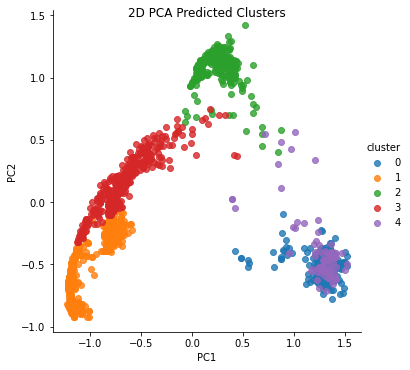

In [35]:
dfPCA2 = dfPCA.iloc[:, [0, 1]].copy()
dfPCA2 = dfPCA2.rename(columns={0: 'PC1', 1: 'PC2'})
dfPCA2['cluster'] = dfPCA[['cluster']]
lm = sns.lmplot(data=dfPCA2, x='PC1', y='PC2',hue='cluster', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D PCA Predicted Clusters", fontsize=12)

Text(0.5, 0.98, '2D PCA Ground Truth Clusters')

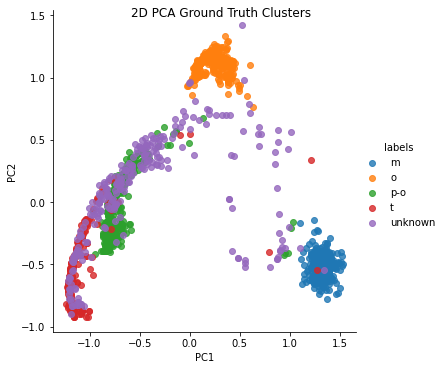

In [36]:
dfPCA2 = dfPCA.iloc[:, [0, 1]].copy()
dfPCA2 = dfPCA2.rename(columns={0: 'PC1', 1: 'PC2'})
dfPCA2['labels'] = dfPCA[['labels']]
lm = sns.lmplot(data=dfPCA2, x='PC1', y='PC2',hue='labels', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D PCA Ground Truth Clusters", fontsize=12)

In [34]:
import plotly.express as px
dfPCA3 = dfPCA.iloc[:, [0, 1, 2]].copy()
dfPCA3 = dfPCA3.rename(columns={0: 'x1', 1: 'x2', 2:'x3'})
dfPCA3['cluster'] = dfPCA[['cluster']]
fig = px.scatter_3d(
    dfPCA3, x='x1', y='x2', z='x3', color=dfPCA3['cluster'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D K-means, XRD Degree Changed'
)
fig.show()

In [33]:
import plotly.express as px
dfPCA3 = dfPCA.iloc[:, [0, 1, 2]].copy()
dfPCA3 = dfPCA3.rename(columns={0: 'x1', 1: 'x2', 2:'x3'})
dfPCA3['labels'] = dfPCA[['labels']]
fig = px.scatter_3d(
    dfPCA3, x='x1', y='x2', z='x3', color=dfPCA3['labels'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Ground Truth, XRD Degree Changed'
)
fig.show()

In [16]:
# NMF Test 
from sklearn import decomposition, datasets, model_selection, preprocessing, metrics

In [ ]:
def get_score(model, data, scorer=metrics.explained_variance_score):
    """ Estimate performance of the model on the data """
    prediction = model.inverse_transform(model.transform(data))
    return scorer(data, prediction)

In [ ]:
ks = [3,4,6,12, 20]
perfs = []
for k in ks:
    nmf = decomposition.NMF(n_components=k, random_state=0, max_iter = 5000).fit(X)
    perfs.append(get_score(nmf, X))
print(perfs)


In [17]:
from sklearn.decomposition import NMF

model = NMF(n_components=4, init='random', random_state=0, max_iter = 5000)
nmf_features_W = model.fit_transform(X)
nmf_componentes_H = model.components_

In [18]:
nmf_df = pd.DataFrame(nmf_componentes_H.T)
W_df = pd.DataFrame(nmf_features_W)
W_df # weights represent abundence of phase at a given nominal composition


,0,1,2,3
0,0.034328,0.071533,0.000000,0.720653
1,0.596075,0.159308,0.189324,0.000000
2,0.103416,0.548735,0.237051,0.024315
3,0.000000,0.693555,0.219692,0.000000
4,0.038515,0.069384,0.000000,0.709724
...,...,...,...,...
1720,0.000000,0.429989,0.569257,0.000000
1721,0.000000,0.064542,0.021503,0.702818
1722,0.598232,0.059309,0.170756,0.019203
1723,0.000000,0.100851,0.897128,0.000000


In [19]:
kmeans = KMeans(n_clusters=5)
nmf_labels = kmeans.fit_predict(W_df)

In [20]:
from sklearn import metrics
metrics.silhouette_score(W_df, nmf_labels, metric='l2')

0.6454692905297916

In [21]:
W_df['cluster'] = nmf_labels
W_df['labels'] = labels_true
W_df.columns = ['x1','x2','x3','x4','cluster', 'labels']
W_df.head(40)

,x1,x2,x3,x4,cluster,labels
0,0.034328,0.071533,0.000000,0.720653,2,m
1,0.596075,0.159308,0.189324,0.000000,1,o
2,0.103416,0.548735,0.237051,0.024315,4,p-o
3,0.000000,0.693555,0.219692,0.000000,4,t
4,0.038515,0.069384,0.000000,0.709724,2,m
5,0.102508,0.524295,0.268611,0.023879,3,p-o
6,0.000000,0.526744,0.409111,0.000000,3,unknown
7,0.029995,0.068881,0.009051,0.717653,2,m
8,0.588482,0.150813,0.207821,0.000000,1,o
9,0.104538,0.532673,0.254350,0.026560,4,p-o


In [ ]:
W_df = W_df.replace({'m': 1, 'p-o': 4, 'o': 0, 't': 3, 'unknown': 2})

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(W_df['labels'], W_df['cluster'])

Text(0.5, 0.98, '2D NMF Predicted Clusters (24.1% Varianz)')

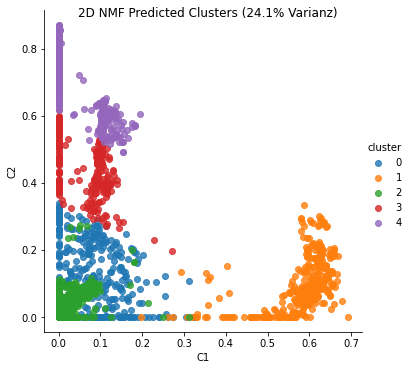

In [22]:
W_df2D  = W_df[['x1', 'x2']]
W_df2D = W_df2D.rename(columns={'x1': 'C1', 'x2': 'C2'})
W_df2D['cluster'] = W_df[['cluster']]
lm = sns.lmplot(data=W_df2D, x='C1', y='C2',hue='cluster', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D NMF Predicted Clusters (24.1% Varianz)", fontsize=12)

Text(0.5, 0.98, '2D NMF Ground Truth Clusters (24.1% Varianz)')

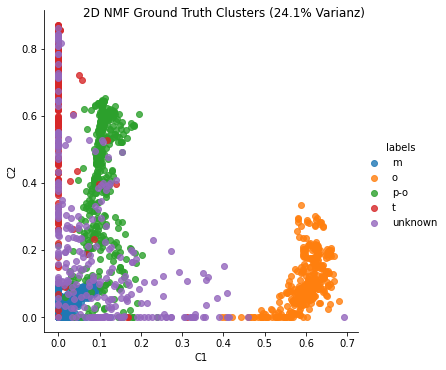

In [23]:
W_df2D  = W_df[['x1', 'x2']]
W_df2D = W_df2D.rename(columns={'x1': 'C1', 'x2': 'C2'})
W_df2D['labels'] = W_df[['labels']]
lm = sns.lmplot(data=W_df2D, x='C1', y='C2',hue='labels', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D NMF Ground Truth Clusters (24.1% Varianz)", fontsize=12)

In [24]:
import plotly.express as px
fig = px.scatter_3d(
    W_df, x='x1', y='x2', z='x3', color=W_df['labels'],
    labels={'x1': 'C1', 'x2': 'C2', 'x3': 'C3'}, title='NMF 3D Ground Truth'
)
fig.show()

In [25]:
import plotly.express as px
fig = px.scatter_3d(
    W_df, x='x1', y='x2', z='x3', color=W_df['cluster'],
    labels={'x1': 'C1', 'x2': 'C2', 'x3': 'C3'}, title='NMF 3D K-Means Prediction'
)
fig.show()

In [26]:
from sklearn.manifold import TSNE

Xtsne = TSNE(n_components=3, perplexity=45).fit_transform(X)
dftsne = pd.DataFrame(Xtsne)

dftsne['labels'] = labels_true
dftsne.columns = ['x1','x2', 'x3', 'labels']
dftsne

,x1,x2,x3,labels
0,0.049882,0.410395,-14.258200,m
1,6.484028,11.913941,7.924569,o
2,-11.626065,-0.689935,-3.958328,p-o
3,1.499980,-12.412470,0.250946,t
4,-0.107982,0.347411,-13.314508,m
...,...,...,...,...
1720,0.333368,-9.090096,8.404209,t
1721,11.993876,-0.571417,-7.714066,m
1722,3.706308,4.843968,0.294618,o
1723,-2.429625,-5.262653,10.885759,unknown


In [27]:
kmeans = KMeans(n_clusters=5)
tsne_labels = kmeans.fit_predict(dftsne[['x1', 'x2', 'x3']])
dftsne['cluster'] = tsne_labels
dftsne.columns = ['x1','x2','x3','labels', 'cluster']
dftsne

,x1,x2,x3,labels,cluster
0,0.049882,0.410395,-14.258200,m,0
1,6.484028,11.913941,7.924569,o,4
2,-11.626065,-0.689935,-3.958328,p-o,3
3,1.499980,-12.412470,0.250946,t,2
4,-0.107982,0.347411,-13.314508,m,0
...,...,...,...,...,...
1720,0.333368,-9.090096,8.404209,t,1
1721,11.993876,-0.571417,-7.714066,m,0
1722,3.706308,4.843968,0.294618,o,4
1723,-2.429625,-5.262653,10.885759,unknown,1


In [28]:
metrics.silhouette_score(dftsne[['x1', 'x2', 'x3']], tsne_labels, metric='l2')

0.506928

Text(0.5, 0.98, '2D TSNE K-Means Prediction Clusters')

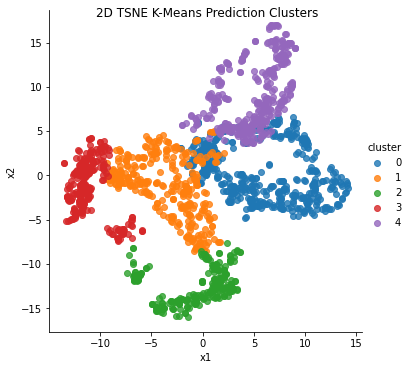

In [29]:
lm = sns.lmplot(data=dftsne, x='x1', y='x2',hue='cluster', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D TSNE K-Means Prediction Clusters", fontsize=12)

Text(0.5, 0.98, '2D TSNE Ground Truth')

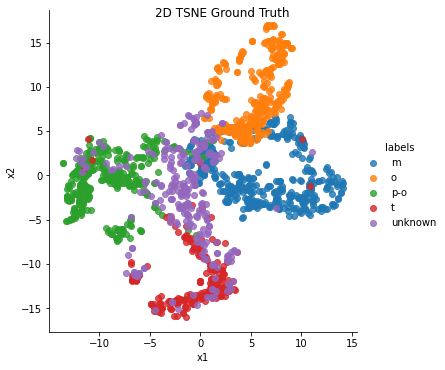

In [30]:
lm = sns.lmplot(data=dftsne, x='x1', y='x2',hue='labels', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D TSNE Ground Truth", fontsize=12)

In [31]:
import plotly.express as px
fig = px.scatter_3d(
    dftsne, x='x1', y='x2', z='x3', color=dftsne['cluster'], title='TSNE 3D Prediction Kmeans'
)
fig.show()

In [32]:
import plotly.express as px

fig = px.scatter_3d(
    dftsne, x='x1', y='x2', z='x3', color=dftsne['labels'], title='TSNE 3D Ground Truth'
)
fig.show()

In [37]:
dftsne.head(40)

,x1,x2,x3,labels,cluster
0,0.049882,0.410395,-14.258200,m,0
1,6.484028,11.913941,7.924569,o,4
2,-11.626065,-0.689935,-3.958328,p-o,3
3,1.499980,-12.412470,0.250946,t,2
4,-0.107982,0.347411,-13.314508,m,0
5,-11.663894,0.138287,-2.943735,p-o,3
6,2.686800,-9.637464,5.946836,unknown,2
7,2.269982,-1.753496,-11.200605,m,0
8,6.408673,11.815398,8.054266,o,4
9,-11.387013,-0.105041,-3.534069,p-o,3


In [38]:
dftsne = dftsne.replace({'m': 0, 'p-o':1, 'o': 4, 't': 2, 'unknown': 1})

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(dftsne['labels'], dftsne['cluster'])

0.7524637681159421